# 아파트 실거래가 분석, 시각화

## 1. 데이터 수집 및 전처리
* 국토교통부 실거래가 공개시스템
    http://www.molit.go.kr/portal.do


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus']= False

In [3]:
os.listdir('./drive/MyDrive/Colab Notebooks/알파코 파이썬 데이터 시각화 입문/Apart Data')

['아파트(매매)__실거래가_20211122131854.csv']

In [4]:
data_src = "./drive/MyDrive/Colab Notebooks/알파코 파이썬 데이터 시각화 입문/Apart Data/아파트(매매)__실거래가_20211122131854.csv"

### 1.1. 데이터 수집

In [25]:
df = pd.read_csv(data_src, encoding='cp949')
df

,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명,해제사유발생일,거래유형,중개사소재지
0,강원도 강릉시 견소동,202,202,0,송정한신,59.800,202108,12,"15,000",2,1997,경강로2539번길 8,NaN,-,-
1,강원도 강릉시 견소동,202,202,0,송정한신,84.945,202108,28,"25,000",1,1997,경강로2539번길 8,NaN,-,-
2,강원도 강릉시 견소동,202,202,0,송정한신,39.080,202108,28,"12,000",7,1997,경강로2539번길 8,NaN,-,-
3,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,59.990,202108,5,"22,700",5,2005,경강로2539번길 22,NaN,-,-
4,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,202108,9,"32,500",6,2005,경강로2539번길 22,NaN,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56238,충청북도 충주시 호암동,1191,1191,0,호암힐데스하임,84.890,202108,24,"41,000",5,2019,호암토성2로 1,NaN,-,-
56239,충청북도 충주시 호암동,1191,1191,0,호암힐데스하임,99.800,202108,27,"52,000",6,2019,호암토성2로 1,NaN,-,-
56240,충청북도 충주시 호암동,1191,1191,0,호암힐데스하임,84.960,202108,27,"42,500",2,2019,호암토성2로 1,NaN,-,-
56241,충청북도 충주시 호암동,1191,1191,0,호암힐데스하임,120.490,202108,31,"58,000",7,2019,호암토성2로 1,NaN,-,-


### 1.2. 데이터 전처리

#### 1.2.1. 해제사유 발생일
* 해제사유 발생일 : 계약이 해지된 건에 대한 해지일

In [26]:
# 해제사유 발생일이 존재하는 데이터 삭제
df[df['해제사유발생일'].notnull()].index

Int64Index([   11,    34,    43,    45,    54,    86,   128,   156,   172,
              218,
            ...
            55967, 55975, 56009, 56017, 56023, 56035, 56074, 56100, 56140,
            56232],
           dtype='int64', length=2094)

In [27]:
df.drop(index = df[df['해제사유발생일'].notnull()].index, inplace=True)

#### 1.2.2. 사용할 컬럼만 추출
* 시군구, 전용면적(㎡), 거래금액(만원)

In [28]:
df = df[['시군구', '전용면적(㎡)', '거래금액(만원)']].copy()
df

,시군구,전용면적(㎡),거래금액(만원)
0,강원도 강릉시 견소동,59.800,"15,000"
1,강원도 강릉시 견소동,84.945,"25,000"
2,강원도 강릉시 견소동,39.080,"12,000"
3,강원도 강릉시 견소동,59.990,"22,700"
4,강원도 강릉시 견소동,84.990,"32,500"
...,...,...,...
56238,충청북도 충주시 호암동,84.890,"41,000"
56239,충청북도 충주시 호암동,99.800,"52,000"
56240,충청북도 충주시 호암동,84.960,"42,500"
56241,충청북도 충주시 호암동,120.490,"58,000"


#### 1.2.3. 자료형 확인 및 변경

In [17]:
df.dtypes

시군구          object
전용면적(㎡)     float64
거래금액(만원)     object
dtype: object

In [29]:
# 거래금액(만원): object-> int64
# 전용면적(㎡) : float64-> int64
df['전용면적(㎡)'] = df['전용면적(㎡)'].astype('int64')
df['거래금액(만원)'] = df['거래금액(만원)'].str.replace(',','').astype('int64')

In [30]:
df.dtypes

시군구         object
전용면적(㎡)      int64
거래금액(만원)     int64
dtype: object

## 2. 시도별 아파트 매매가 데이터 추출

### 2.1. 시도 컬럼 추가

In [31]:
df

,시군구,전용면적(㎡),거래금액(만원)
0,강원도 강릉시 견소동,59,15000
1,강원도 강릉시 견소동,84,25000
2,강원도 강릉시 견소동,39,12000
3,강원도 강릉시 견소동,59,22700
4,강원도 강릉시 견소동,84,32500
...,...,...,...
56238,충청북도 충주시 호암동,84,41000
56239,충청북도 충주시 호암동,99,52000
56240,충청북도 충주시 호암동,84,42500
56241,충청북도 충주시 호암동,120,58000


In [33]:
df['시도'] = df['시군구'].str.split(' ').str[0]
df

,시군구,전용면적(㎡),거래금액(만원),시도
0,강원도 강릉시 견소동,59,15000,강원도
1,강원도 강릉시 견소동,84,25000,강원도
2,강원도 강릉시 견소동,39,12000,강원도
3,강원도 강릉시 견소동,59,22700,강원도
4,강원도 강릉시 견소동,84,32500,강원도
...,...,...,...,...
56238,충청북도 충주시 호암동,84,41000,충청북도
56239,충청북도 충주시 호암동,99,52000,충청북도
56240,충청북도 충주시 호암동,84,42500,충청북도
56241,충청북도 충주시 호암동,120,58000,충청북도


In [34]:
df['시도'].unique()

array(['강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시', '부산광역시',
       '서울특별시', '세종특별자치시', '울산광역시', '인천광역시', '전라남도', '전라북도', '제주특별자치도',
       '충청남도', '충청북도'], dtype=object)

In [35]:
df['시도'].nunique()

17

### 2.2. 분석할 전용면적 선택

In [36]:
# 같은 지역이어도 전용면적이 다르면 거래금액이 달라지기 떄문에
# 분석할 전용면적을 선택해준다.-> 거래가 가장 많았던 전용면적으로 선택
df['전용면적(㎡)'].value_counts()

# 84로 선택

84     16709
59     13125
49      2256
39      1288
74      1016
       ...  
243        1
214        1
230        1
207        1
222        1
Name: 전용면적(㎡), Length: 213, dtype: int64

### 2.3. 분석할 전용면적 서브셋

In [37]:
df_84 = df[df['전용면적(㎡)']==84].copy()
df_84

,시군구,전용면적(㎡),거래금액(만원),시도
1,강원도 강릉시 견소동,84,25000,강원도
4,강원도 강릉시 견소동,84,32500,강원도
7,강원도 강릉시 견소동,84,31900,강원도
9,강원도 강릉시 교동,84,41000,강원도
14,강원도 강릉시 교동,84,37900,강원도
...,...,...,...,...
56236,충청북도 충주시 호암동,84,47700,충청북도
56237,충청북도 충주시 호암동,84,41800,충청북도
56238,충청북도 충주시 호암동,84,41000,충청북도
56240,충청북도 충주시 호암동,84,42500,충청북도


### 2.4. 시도별 평균, 최대, 최소, 중간값 추출

In [40]:
# 시도로 그룹핑
# 평균
df_84_mean = df_84.groupby('시도')['거래금액(만원)'].mean()
df_84_mean

시도
강원도         25735.603214
경기도         57935.884750
경상남도        30821.486979
경상북도        25636.574724
광주광역시       38281.782713
대구광역시       39517.411444
대전광역시       45900.591398
부산광역시       43642.905830
서울특별시      121650.927757
세종특별자치시     71412.643678
울산광역시       36790.119760
인천광역시       52835.016497
전라남도        23643.111987
전라북도        26839.718367
제주특별자치도     43831.702128
충청남도        26264.903790
충청북도        28915.154827
Name: 거래금액(만원), dtype: float64

In [41]:
# 최대
df_84_max = df_84.groupby('시도')['거래금액(만원)'].max()
df_84_max
# 서울특별시 최대(384500)와 평균(121650.927757)이 차이가 크다.

시도
강원도         72500
경기도        220000
경상남도       109000
경상북도        64500
광주광역시      104500
대구광역시      148000
대전광역시      127000
부산광역시      183000
서울특별시      384500
세종특별자치시    119000
울산광역시      120000
인천광역시      130000
전라남도        74000
전라북도        66500
제주특별자치도     95000
충청남도        94500
충청북도        72000
Name: 거래금액(만원), dtype: int64

In [ ]:
# 최소
df_84_min = df_84.groupby('시도')['거래금액(만원)'].min()


In [ ]:
# 중간값
df_84_median = df_84.groupby('시도')['거래금액(만원)'].median()


In [46]:
# 하나로 합치기
df_84_price = pd.concat([df_84_mean, df_84_max, df_84_min, 
                         df_84_median], axis=1)
df_84_price

,거래금액(만원),거래금액(만원),거래금액(만원),거래금액(만원)
시도,,,,
강원도,25735.603214,72500,7000,23700.0
경기도,57935.884750,220000,7400,52500.0
경상남도,30821.486979,109000,5300,28400.0
경상북도,25636.574724,64500,4000,25219.0
광주광역시,38281.782713,104500,10700,34000.0
대구광역시,39517.411444,148000,13700,35900.0
대전광역시,45900.591398,127000,12500,44435.0
부산광역시,43642.905830,183000,9400,38000.0
서울특별시,121650.927757,384500,29500,109000.0


In [47]:
# 컬럼명 변경
df_84_price.columns = ['평균','최대','최소','중간']
df_84_price

,평균,최대,최소,중간
시도,,,,
강원도,25735.603214,72500,7000,23700.0
경기도,57935.884750,220000,7400,52500.0
경상남도,30821.486979,109000,5300,28400.0
경상북도,25636.574724,64500,4000,25219.0
광주광역시,38281.782713,104500,10700,34000.0
대구광역시,39517.411444,148000,13700,35900.0
대전광역시,45900.591398,127000,12500,44435.0
부산광역시,43642.905830,183000,9400,38000.0
서울특별시,121650.927757,384500,29500,109000.0


In [50]:
# 평균이 높은 순으로 정렬
df_84_price.sort_values('평균', ascending=False, inplace=True)
df_84_price

,평균,최대,최소,중간
시도,,,,
서울특별시,121650.927757,384500,29500,109000.0
세종특별자치시,71412.643678,119000,23800,74000.0
경기도,57935.884750,220000,7400,52500.0
인천광역시,52835.016497,130000,16700,47500.0
대전광역시,45900.591398,127000,12500,44435.0
제주특별자치도,43831.702128,95000,13500,42750.0
부산광역시,43642.905830,183000,9400,38000.0
대구광역시,39517.411444,148000,13700,35900.0
광주광역시,38281.782713,104500,10700,34000.0


In [51]:
# 평균 소수점 첫째자리까지만
df_84_price['평균'] = round(df_84_price['평균'],1)
df_84_price

,평균,최대,최소,중간
시도,,,,
서울특별시,121650.9,384500,29500,109000.0
세종특별자치시,71412.6,119000,23800,74000.0
경기도,57935.9,220000,7400,52500.0
인천광역시,52835.0,130000,16700,47500.0
대전광역시,45900.6,127000,12500,44435.0
제주특별자치도,43831.7,95000,13500,42750.0
부산광역시,43642.9,183000,9400,38000.0
대구광역시,39517.4,148000,13700,35900.0
광주광역시,38281.8,104500,10700,34000.0


## 3. 시도별 아파트 매매가 현황 시각화
* 다중막대그래프

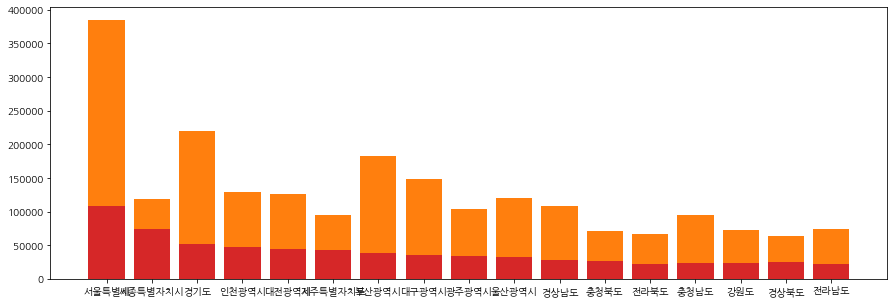

In [57]:
plt.rcParams['figure.figsize']=(15,5)
plt.bar(df_84_price.index, df_84_price['평균'],label='평균')
plt.bar(df_84_price.index, df_84_price['최대'], label='최대')

plt.bar(df_84_price.index, df_84_price['최소'],label='최소')
plt.bar(df_84_price.index, df_84_price['중간'], label='중간')

# 겹쳐 있어서 가려지는 막대가 생기고 보기 불편하다.
plt.show()

In [59]:
# x축을 숫자로 해서 4가지 막대 위치조정.
import numpy as np
x_index = np.arange(1,len(df_84_price)+1)
x_index

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

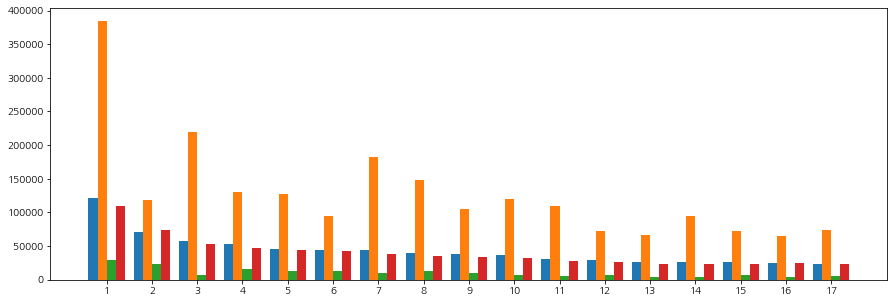

In [62]:
plt.rcParams['figure.figsize']=(15,5)

plt.bar(x_index-0.3, df_84_price['평균'],label='평균',
        width=0.2)
plt.bar(x_index-0.1, df_84_price['최대'], label='최대',
        width=0.2)
plt.bar(x_index+0.1, df_84_price['최소'],label='최소',
        width=0.2)
plt.bar(x_index+0.3, df_84_price['중간'], label='중간',
        width=0.2)

plt.xticks(x_index)
plt.show()

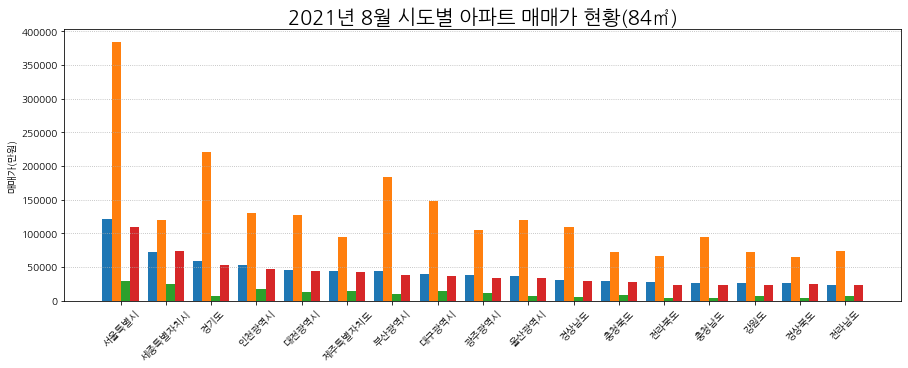

In [66]:
# x틱 이름 다시 변경해주기
plt.rcParams['figure.figsize']=(15,5)

plt.bar(x_index-0.3, df_84_price['평균'],label='평균',
        width=0.2)
plt.bar(x_index-0.1, df_84_price['최대'], label='최대',
        width=0.2)
plt.bar(x_index+0.1, df_84_price['최소'],label='최소',
        width=0.2)
plt.bar(x_index+0.3, df_84_price['중간'], label='중간',
        width=0.2)

plt.xticks(x_index, labels=df_84_price.index, rotation=45)
plt.ylabel('매매가(만원)')
plt.grid(axis='y',ls=':')
plt.title('2021년 8월 시도별 아파트 매매가 현황(84㎡)',size=20)
plt.show()

## 4. 서울시 아파트 매매가 분포

### 4.1. 서울시 서브셋

In [71]:
df_84_seoul = df_84[df_84['시도']=='서울특별시'].copy()
df_84_seoul

,시군구,전용면적(㎡),거래금액(만원),시도
35560,서울특별시 강남구 개포동,84,285000,서울특별시
35561,서울특별시 강남구 개포동,84,275000,서울특별시
35567,서울특별시 강남구 개포동,84,289000,서울특별시
35573,서울특별시 강남구 개포동,84,298000,서울특별시
35583,서울특별시 강남구 개포동,84,77000,서울특별시
...,...,...,...,...
39823,서울특별시 중랑구 신내동,84,75000,서울특별시
39824,서울특별시 중랑구 신내동,84,73500,서울특별시
39828,서울특별시 중랑구 중화동,84,90000,서울특별시
39833,서울특별시 중랑구 중화동,84,88000,서울특별시


### 4.2. 구 컬럼 추가

In [73]:
df_84_seoul['구'] = df_84_seoul['시군구'].str.split(' ').str[1]
df_84_seoul

,시군구,전용면적(㎡),거래금액(만원),시도,구
35560,서울특별시 강남구 개포동,84,285000,서울특별시,강남구
35561,서울특별시 강남구 개포동,84,275000,서울특별시,강남구
35567,서울특별시 강남구 개포동,84,289000,서울특별시,강남구
35573,서울특별시 강남구 개포동,84,298000,서울특별시,강남구
35583,서울특별시 강남구 개포동,84,77000,서울특별시,강남구
...,...,...,...,...,...
39823,서울특별시 중랑구 신내동,84,75000,서울특별시,중랑구
39824,서울특별시 중랑구 신내동,84,73500,서울특별시,중랑구
39828,서울특별시 중랑구 중화동,84,90000,서울특별시,중랑구
39833,서울특별시 중랑구 중화동,84,88000,서울특별시,중랑구


In [75]:
df_84_seoul['구'].unique()

array(['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구',
       '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
       '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구'], dtype=object)

In [76]:
df_84_seoul['구'].nunique()

25

### 4.3. 박스플롯으로 시각화

#### 4.3.1. 구별 데이터 분리

In [79]:
# 구이름
seoul_gu = df_84_seoul['구'].unique()
seoul_gu

array(['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구',
       '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
       '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구'], dtype=object)

In [80]:
# 구별 거래금액(만원) 데이터 분리
# 그룹핑한 데이터들 중 특정 그룹만 가져오기
df_84_seoul.groupby('구')['거래금액(만원)'].get_group('강남구')

35560    285000
35561    275000
35567    289000
35573    298000
35583     77000
          ...  
35883     96150
35889     94700
35892     94300
35901    200000
35907    190000
Name: 거래금액(만원), Length: 84, dtype: int64

In [81]:
# 전체 구별 거래금액(만원) 데이터 리스트 만들기
df_seoul_gu = []
for i in range(len(seoul_gu)):
    df_seoul_gu.append(df_84_seoul.groupby('구')['거래금액(만원)'].get_group(seoul_gu[i]))

In [91]:
df_seoul_gu
# 여러개의 시리즈가 리스트에 추가됨

[35560    285000
 35561    275000
 35567    289000
 35573    298000
 35583     77000
           ...  
 35883     96150
 35889     94700
 35892     94300
 35901    200000
 35907    190000
 Name: 거래금액(만원), Length: 84, dtype: int64, 35909    115000
 35910    115000
 35912    113000
 35914    114800
 35915    115000
           ...  
 36072     86700
 36073     95000
 36076    176000
 36086    105000
 36087     74500
 Name: 거래금액(만원), Length: 61, dtype: int64, 36099     94400
 36100    107000
 36101    115000
 36102    113000
 36104    106000
 36106    103000
 36110    104000
 36111     88000
 36113     73000
 36114     80000
 36116     77000
 36122     82000
 36123     80500
 36124     83000
 36125     81000
 36126     85000
 36129     85700
 36131    105000
 36138     79000
 36142     82000
 36144     84000
 36148     83000
 36149     80000
 36150     83000
 36151     82000
 36156     58000
 36161     60000
 36163     64000
 36167     67900
 36169     83500
 36170     78800
 36171     6290

In [83]:
# 0번째는 강남구
df_seoul_gu[0]

35560    285000
35561    275000
35567    289000
35573    298000
35583     77000
          ...  
35883     96150
35889     94700
35892     94300
35901    200000
35907    190000
Name: 거래금액(만원), Length: 84, dtype: int64

#### 4.3.2. 박스플롯으로 시각화

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


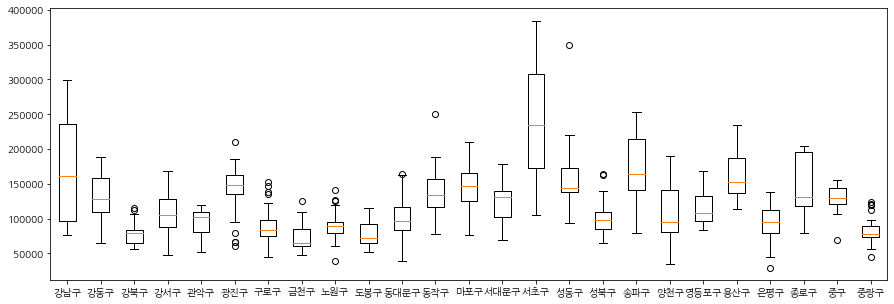

In [86]:
# 여러개의 박스플롯을 그릴 때는 리스트로 여러 데이터프레임을 전달
plt.boxplot(df_seoul_gu, labels=seoul_gu)
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


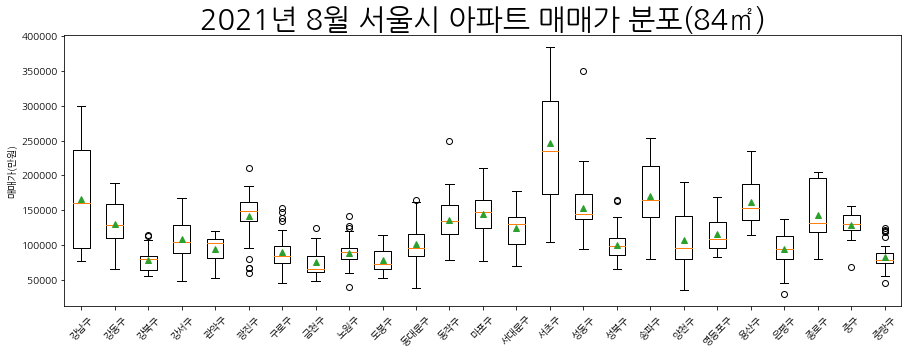

In [90]:
# 평균추가 하고 그래프 완성하기
plt.boxplot(df_seoul_gu, labels=seoul_gu,
            showmeans=True)
plt.xticks(rotation=45)
plt.ylabel('매매가(만원)')
plt.title('2021년 8월 서울시 아파트 매매가 분포(84㎡)', size=29)
plt.show()
# 성동구에는 평균값보다 훨씬 높게 거래된 데이터가 있다.
# 서초구와 강남구는 매매가의 분포가 넓다.

## 5. 서울시 아파트 구별 평균 매매가, 거래건수
* 2중 y축

### 5.1. 서울시 아파트 구별 평균 매매가

In [94]:
df_84_seoul_mean = df_84_seoul.groupby('구')['거래금액(만원)'].mean()
df_84_seoul_mean = round(df_84_seoul_mean,1)
df_84_seoul_mean

구
강남구     166324.5
강동구     130831.1
강북구      78541.3
강서구     107935.7
관악구      94022.2
광진구     141525.0
구로구      89275.4
금천구      75415.4
노원구      89126.3
도봉구      77755.1
동대문구    102024.5
동작구     136100.0
마포구     145163.1
서대문구    124358.7
서초구     246792.5
성동구     152622.2
성북구      99480.3
송파구     171039.4
양천구     107729.2
영등포구    115432.1
용산구     161473.7
은평구      94170.7
종로구     143280.0
중구      129078.6
중랑구      82726.4
Name: 거래금액(만원), dtype: float64

### 5.2. 서울시 아파트 구별 거래건수

In [97]:
df_84_seoul_count = df_84_seoul.groupby('구')['거래금액(만원)'].count()
df_84_seoul_count

구
강남구      84
강동구      61
강북구      46
강서구      98
관악구      36
광진구      32
구로구      57
금천구      26
노원구      57
도봉구      49
동대문구     49
동작구      63
마포구      61
서대문구     52
서초구      40
성동구      72
성북구     104
송파구      71
양천구      48
영등포구     53
용산구      19
은평구      58
종로구      12
중구       14
중랑구      53
Name: 거래금액(만원), dtype: int64

In [99]:
# 정렬
df_84_seoul_count.sort_values(ascending=False)

구
성북구     104
강서구      98
강남구      84
성동구      72
송파구      71
동작구      63
강동구      61
마포구      61
은평구      58
노원구      57
구로구      57
영등포구     53
중랑구      53
서대문구     52
도봉구      49
동대문구     49
양천구      48
강북구      46
서초구      40
관악구      36
광진구      32
금천구      26
용산구      19
중구       14
종로구      12
Name: 거래금액(만원), dtype: int64

## 5.3. 서울시 아파트 구별 평균 매매가, 거래건수 시각화

#### 5.3.1. 서브셋 생성

In [102]:
# 두 데이터 프레임은 인덱스의 순서만 다를뿐 내용은 같기 때문에 concat으로 합친다.
# 순서 통일
df_84_seoul_mean_count = pd.concat([df_84_seoul_mean, df_84_seoul_count], axis=1)
df_84_seoul_mean_count

,거래금액(만원),거래금액(만원)
구,,
강남구,166324.5,84
강동구,130831.1,61
강북구,78541.3,46
강서구,107935.7,98
관악구,94022.2,36
광진구,141525.0,32
구로구,89275.4,57
금천구,75415.4,26
노원구,89126.3,57


In [106]:
# 컬럼명 변경 후 정렬
df_84_seoul_mean_count.columns=['평균매매가(만원)','거래건수']
df_84_seoul_mean_count = df_84_seoul_mean_count.sort_values('평균매매가(만원)', 
                                                            ascending=False)
df_84_seoul_mean_count

,평균매매가(만원),거래건수
구,,
서초구,246792.5,40
송파구,171039.4,71
강남구,166324.5,84
용산구,161473.7,19
성동구,152622.2,72
마포구,145163.1,61
종로구,143280.0,12
광진구,141525.0,32
동작구,136100.0,63


#### 5.3.2 시각화
* fig, ax1 = plt.subplots()

    ax2 = ax1.twinx()

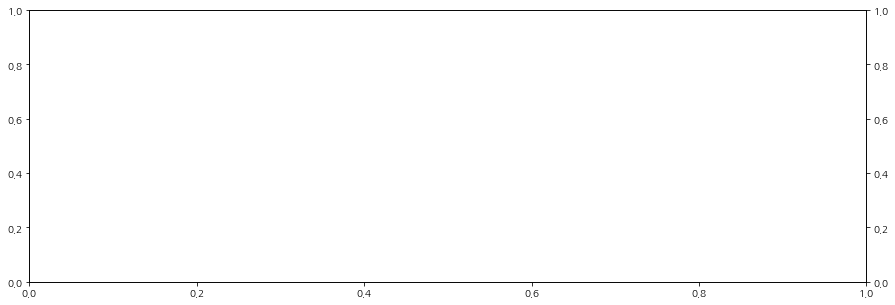

In [107]:
# 틀만들기
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
plt.show()

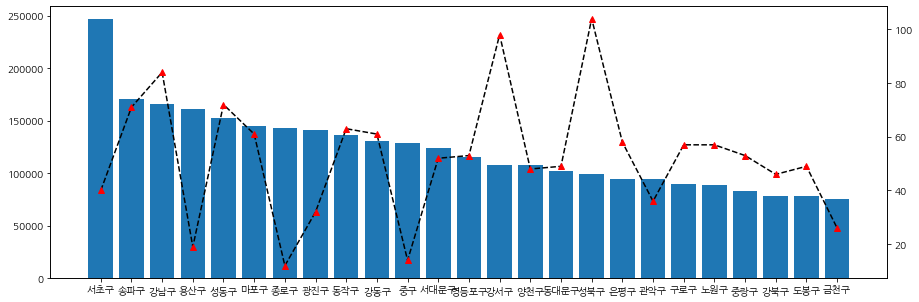

In [114]:
# 틀만들기
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

# 그래프 그리기
ax1.bar(df_84_seoul_mean_count.index, df_84_seoul_mean_count['평균매매가(만원)'], 
        label='평균매매가(만원)')
ax2.plot(df_84_seoul_mean_count['거래건수'], 'k^--', mfc='r',mec='r',
        label='거래건수')

plt.xticks(rotation=45)
plt.show()

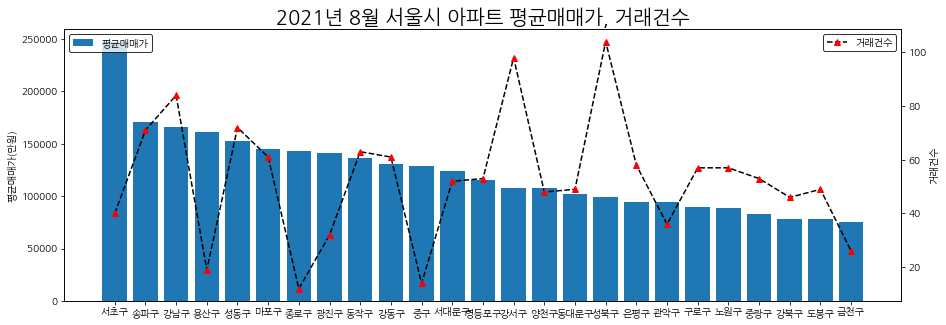

In [117]:
# 틀만들기
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

# 그래프 그리기
ax1.bar(df_84_seoul_mean_count.index, df_84_seoul_mean_count['평균매매가(만원)'], 
        label='평균매매가')
ax2.plot(df_84_seoul_mean_count['거래건수'], 'k^--', mfc='r',mec='r',
        label='거래건수')
plt.xticks(rotation=45)

# 범례
ax1.legend(loc='upper left', edgecolor='k')
ax2.legend(loc= 'upper right', edgecolor='k')

# y 레이블
ax1.set_ylabel('평균매매가(만원)')
ax2.set_ylabel('거래건수')

# 제목
plt.title('2021년 8월 서울시 아파트 평균매매가, 거래건수', size=20)

plt.show()

# 평균 매매가 서초구가 가장 높다. 25억 정도
# 성북구와 강남구가 거래건수 많다.
# 용산구 종로구 중구는 적다.

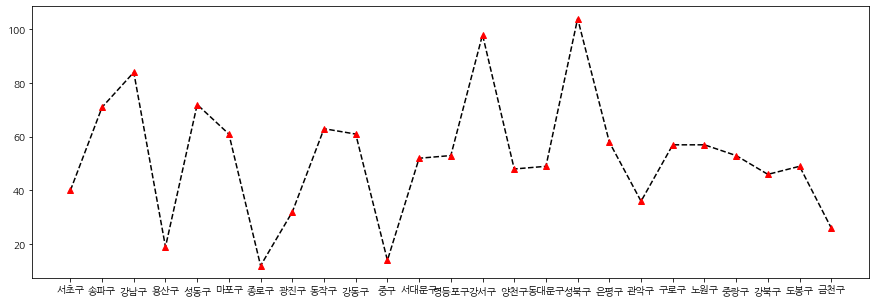

In [118]:
plt.plot(df_84_seoul_mean_count['거래건수'], 'k^--', mfc='r',mec='r',
        label='거래건수')